# Simple Tokenization and Word Counting with Unix*

Let's see how far we can get with using Unix commands to tokenize and count words in plain text files. We'll use the complete works of William Shakespeare as our case study. First we went to Project Gutenberg and grabbed a copy of his complete works as a plain text file. Let's look at the first few lines.

\* Inspired by Ken Church's Unix for Poets

In [1]:
cat shakes.txt | head

THE SONNETS

by William Shakespeare

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,


Many of the text-oriented Unix tools are line oriented. So it would be useful to have each word on a line by itself. To do this let's do some really dumb tokenization using the 'tr' command. Let's convert anything that isn't an alphabetic character to a carriage return (I said it was dumb).  'tr' works by taking two patterns and converts matches in the first to corresponding elements in the second.  In this case, we're using the -c option which takes the complement of the first pattern.  The -s option collapses repeated translations to a single one. In plain English that means converted anything that isn't a letter to a carriage return. 

In [4]:
tr -sc 'A-Za-z' '\n' < shakes.txt | head

THE
SONNETS
by
William
Shakespeare
From
fairest
creatures
we
desire


Given the one word per line format we can use 'sort' to gather all instances of the same type together.

In [2]:
tr -sc 'A-Za-z' '\n' < shakes.txt | sort | head

A
A
A
A
A
A
A
A
A
A


That's not all that illuminating.  Fortunately, the 'uniq' command can help. Uniq collapses repeated lines to a single line. 

In [5]:
tr -sc 'A-Za-z' '\n' < shakes.txt | sort | uniq | head


A
AARON
ABBESS
ABBOT
ABERGAVENNY
ABHORSON
ABOUT
ACHILLES
ACT


Counting the number of lines using 'wc' will give us the size of Shakespeare's vocabulary. 

In [3]:
tr -sc 'A-Za-z' '\n' < shakes.txt | sort | uniq | wc -l

   29152


That's probably off since we're treating lower case and upper case separately, so he's getting double credit for the same word. We can use 'tr' again to fix that by first downcasing everything.

In [5]:
tr 'A-Z' 'a-z' < shakes.txt > shakesdown.txt

In [7]:
tr -cs "a-z" '\n' < shakesdown.txt | sort | uniq | wc -l

   23512


That's more like it. Now it might be good to know the frequency with which he used each of those words. Fortunately, the -c option to 'uniq' that gives us the count as it collapses those repeated lines.

In [13]:
tr -sc 'a-z' '\n' | sort | uniq -c | head

   1 
14725 a
  97 aaron
   1 abaissiez
  10 abandon
   2 abandoned
   2 abase
   1 abash
  14 abate
   3 abated


Probably more useful if that was sorted numerically by frequency.  

In [9]:
tr -sc 'a-z' '\n' < shakesdown.txt | sort | uniq -c | sort -rn | head

27378 the
26084 and
22538 i
19771 to
17481 of
14725 a
13826 you
12490 my
11318 that
11112 in


If we save those counts and plot them from the highest to lowest we get a pattern that we'll see again and again. Let's save the 1000 most frequent words and then look at a plot of that.

In [10]:
tr -sc 'a-z' '\n' < shakesdown.txt | sort | uniq -c | sort -rn | head -n 1000 > shakes-top-1000.txt

This is a very common kind of distribution called a long tail distribution.  The highest frequency words are very frequent. But word frequency drops very quickly until we have a long long tail of words that have occured only one time. For word frequencies this typically corresponds to what's called a Zipf distribution. It has large implications for how we build statistical models using machine learning methods. 

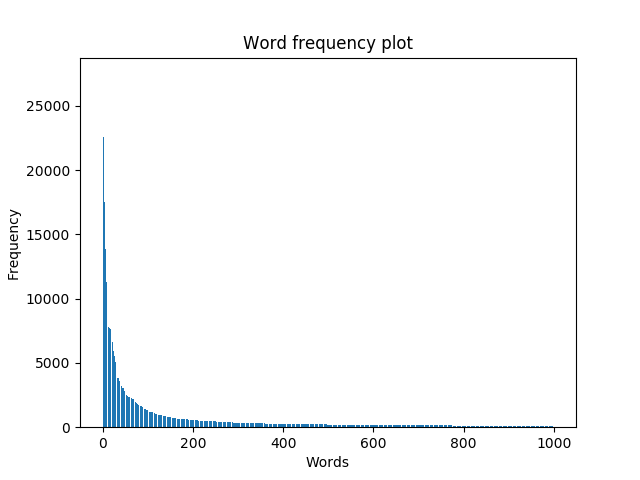

In [11]:
python word-freq-plot.py shakes-top-1000.txt | display